- different operation statuses
- Compare both states (different energy sources) (First, Solar panels and Field)


In [9]:
conda install matplotlib

Solving environment: / ^C
failed with initial frozen solve. Retrying with flexible solve.

CondaError: KeyboardInterrupt


Note: you may need to restart the kernel to use updated packages.


In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df = pd.read_csv("finalV1.csv")

In [20]:
def convert_column_data_type(dataframe, column_type, column_names=[]):
    for column in column_names: 
        dataframe[column] = dataframe[column].str.replace(',','.').astype(column_type)
    return dataframe

In [24]:
def get_columns_from_df(dataframe, column_names=[]):
    return dataframe[column_names]

In [21]:
# Convert gross power to float.
columns_to_convert = ["Nettonennleistung der Einheit", "Bruttoleistung der Einheit"]
df = convert_column_data_type(df, "float", columns_to_convert)

In [22]:
df.head()

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
0,SEE922425735582,Solaranlage,In Betrieb,Solare Strahlungsenergie,9.99,8.2,10/19/2016,2/2/2019,Bayern,92439,...,SEL922220792711,EEG932892356777,NaN,10/19/2016,"9,99",NaN,NaN,NaN,NaN,NaN
1,SEE913667551542,PV-Anlage,In Betrieb,Solare Strahlungsenergie,6.12,6.0,7/11/2016,1/31/2019,Baden-Württemberg,88368,...,SEL961238445707,EEG959469675345,E10843010000000000000087353900001,7/11/2016,"6,12",NaN,NaN,NaN,NaN,NaN
2,SEE962350176159,Hausdach,In Betrieb,Solare Strahlungsenergie,4.16,3.0,7/19/2016,1/31/2019,Baden-Württemberg,77743,...,SEL995119103929,EEG951922168470,E11904010292008219006000S00100001,7/19/2016,"4,16",NaN,NaN,NaN,NaN,NaN
3,SEE983966266850,MRKDach,In Betrieb,Solare Strahlungsenergie,15.08,15.0,8/5/2016,2/9/2019,Baden-Württemberg,75378,...,SEL966967654833,EEG904474851208,E10843010000000000000087766600001,8/5/2016,"15,08",NaN,NaN,NaN,NaN,NaN
4,SEE914434267031,Stromspeicher,In Betrieb,Speicher,2.00,2.0,4/13/2016,2/9/2019,Bayern,91629,...,SEL985610916852,EEG985648910952,NaN,4/13/2016,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
df.shape

(799137, 50)

In [25]:
df_bayern = df[df["Bundesland"]=="Bayern"]
df_bayern.head()
df_bayern.shape

(470126, 50)

In [33]:
df.columns

Index(['MaStR-Nr. der Einheit', 'Anzeige-Name der Einheit', 'Betriebs-Status',
       'Energieträger', 'Bruttoleistung der Einheit',
       'Nettonennleistung der Einheit', 'Inbetriebnahmedatum der Einheit',
       'Registrierungsdatum der Einheit', 'Bundesland', 'Postleitzahl', 'Ort',
       'Straße', 'Hausnummer', 'Gemarkung', 'Flurstück', 'Gemeindeschlüssel',
       'Koordinate: Breitengrad (WGS84)', 'Koordinate: Längengrad (WGS84)',
       'Anzahl der Solar-Module', 'Hauptausrichtung der Solar-Module',
       'Name des Windparks', 'Nabenhöhe der Windenergieanlage',
       'Rotordurchmesser der Windenergieanlage',
       'Hersteller der Windenergieanlage', 'Typenbezeichnung',
       'Hauptbrennstoff der Einheit', 'Nutzbare Speicherkapazität in kWh',
       'Technologie der Stromerzeugung', 'Lage der Einheit',
       'Letzte Aktualisierung', 'Datum der endgültigen Stilllegung',
       'Datum der geplanten Inbetriebnahme',
       'Name des Anlagenbetreibers (nur Org.)',
       '\tMaSt

## Nettonennleistung- Orts

In [54]:
sum_netpower_for_each_ort = df_bayern.groupby(["Ort"])["Nettonennleistung der Einheit"].sum().reset_index()
sum_netpower_for_each_ort_2 = sum_power_for_each_ort.sort_values(by=['Nettonennleistung der Einheit'],ascending=False)
sum_netpower_for_each_ort_2

,Ort,Nettonennleistung der Einheit
1133,München,278429.071
1784,Töging,143669.085
1204,Nürnberg,110576.304
1568,Schongau,81522.005
1063,Maßbach,71983.020
...,...,...
1419,Reichelshof,7.000
2037,zeilarn,7.000
1263,Oderberg,6.000
1562,Schneefernerhaus,4.500


/tmp/ipykernel_151/3949116934.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort_3, ci=None, estimator=sum)


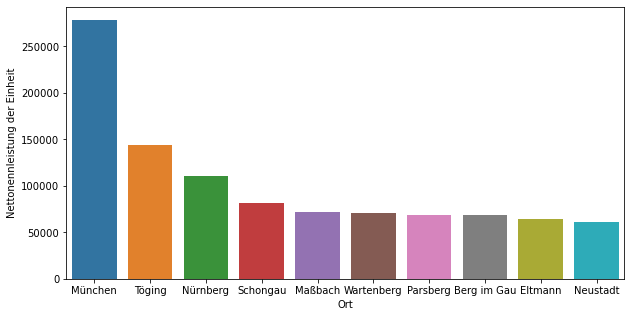

In [55]:
sum_netpower_for_each_ort_3 = sum_netpower_for_each_ort_2.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Ort', y='Nettonennleistung der Einheit', data=sum_netpower_for_each_ort_3, ci=None, estimator=sum)
plt.show()

## Bruttoleistung - Orts

In [57]:
sum_grosspower_for_each_ort = df_bayern.groupby(["Ort"])["Bruttoleistung der Einheit"].sum().reset_index()
sum_grosspower_for_each_ort_2 = sum_grosspower_for_each_ort.sort_values(by=['Bruttoleistung der Einheit'],ascending=False)
sum_grosspower_for_each_ort_2

,Ort,Bruttoleistung der Einheit
1133,München,329536.371
1784,Töging,144291.330
1204,Nürnberg,118092.302
1568,Schongau,85127.025
1293,Parsberg,76229.453
...,...,...
1419,Reichelshof,7.840
2037,zeilarn,7.500
1263,Oderberg,6.240
1562,Schneefernerhaus,5.530


/tmp/ipykernel_151/807865887.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_grosspower_for_each_ort_3, ci=None, estimator=sum)


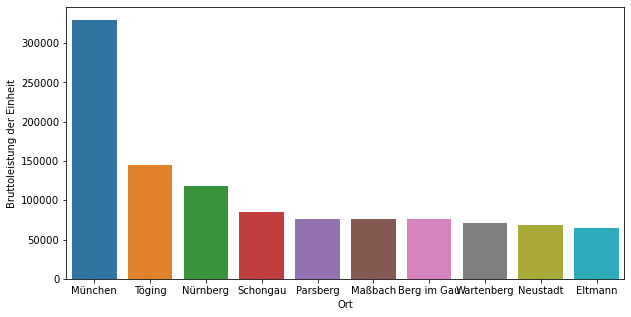

In [58]:
sum_grosspower_for_each_ort_3 = sum_grosspower_for_each_ort_2.head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='Ort', y='Bruttoleistung der Einheit', data=sum_grosspower_for_each_ort_3, ci=None, estimator=sum)
plt.show()

## Power source Bayern

In [62]:
power_source_bayern = df_bayern.groupby(["Energieträger"])["Nettonennleistung der Einheit"].sum().reset_index()
power_source_bayern_2 = power_source_bayern.sort_values(by=['Nettonennleistung der Einheit'],ascending=False)
power_source_bayern_2

,Energieträger,Nettonennleistung der Einheit
8,Solare Strahlungsenergie,8.549714e+06
12,Wind,1.805008e+06
3,Erdgas,1.082750e+06
0,Biomasse,8.233769e+05
10,Speicher,7.876538e+05
11,Wasser,1.958592e+05
7,Mineralölprodukte,1.662175e+05
4,Geothermie,4.468200e+04
14,andere Gase,4.051608e+04
15,nicht biogener Abfall,9.300000e+03


/tmp/ipykernel_151/1443002697.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=power_source_bayern_3, ci=None, estimator=sum)


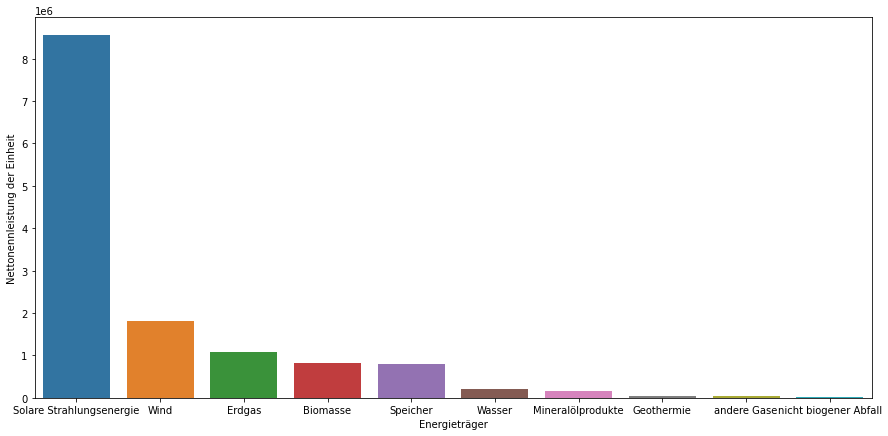

In [68]:
power_source_bayern_3 = power_source_bayern_2.head(10)
plt.figure(figsize=(15,7))
sns.barplot(x='Energieträger', y='Nettonennleistung der Einheit', data=power_source_bayern_3, ci=None, estimator=sum)
plt.show()

<AxesSubplot:>

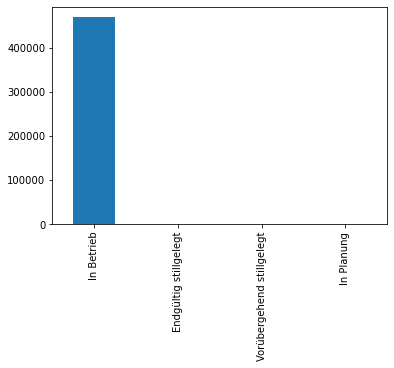

In [83]:
df_bayern["Betriebs-Status"].value_counts().plot(kind='bar') 


In [81]:
df_bayern["Betriebs-Status"].unique()

array(['In Betrieb', 'Endgültig stillgelegt', 'Vorübergehend stillgelegt',
       'In Planung'], dtype=object)

In [87]:
df_bayern["Lage der Einheit"].unique()

array(['Bauliche Anlagen (Hausdach, Gebäude und Fassade)', nan,
       'Windkraft an Land', 'Bauliche Anlagen (Sonstige)', 'Freifläche',
       'Steckerfertige Erzeugungsanlage (sog. Plug-In- oder Balkon-PV-Anlage)'],
      dtype=object)

In [88]:
df_bayern["Energieträger"].unique()

array(['Solare Strahlungsenergie', 'Speicher', 'Wind', 'Erdgas',
       'Biomasse', 'Wasser', 'andere Gase', 'Mineralölprodukte',
       'Klärschlamm', 'Wärme', 'Solarthermie', 'Geothermie',
       'Druck aus Gasleitungen', 'Grubengas', 'nicht biogener Abfall',
       'Druck aus Wasserleitungen'], dtype=object)

In [100]:
df_bayern_Freifläche = df_bayern[df_bayern['Lage der Einheit'] == 'Freifläche']
df_bayern_Freifläche_Solar1 = df_bayern_Freifläche[df_bayern_Freifläche['Energieträger'] == 'Solare Strahlungsenergie']

df_bayern_Freifläche_Solar1

,MaStR-Nr. der Einheit,Anzeige-Name der Einheit,Betriebs-Status,Energieträger,Bruttoleistung der Einheit,Nettonennleistung der Einheit,Inbetriebnahmedatum der Einheit,Registrierungsdatum der Einheit,Bundesland,Postleitzahl,...,MaStR-Nr. der Lokation,MaStR-Nr. der EEG-Anlage,EEG-Anlagenschlüssel,Inbetriebnahmedatum der EEG-Anlage,Installierte Leistung,Zuschlagnummer (EEG/KWK-Ausschreibung),MaStR-Nr. der KWK-Anlage,Inbetriebnahmedatum der KWK-Anlage,Elektrische KWK-Leistung,Thermische Nutzleistung in kW
1723,SEE998263299272,ValBR,In Betrieb,Solare Strahlungsenergie,1497.600,1380.00,8/8/2016,3/27/2019,Bayern,96476,...,SEL922723062670,EEG982010703075,E21762010005479647601000000100325,8/8/2016,"1497,6",NaN,NaN,NaN,NaN,NaN
2435,SEE970015820255,PVA Gattendorf 2,In Betrieb,Solare Strahlungsenergie,3758.000,3630.00,7/14/2016,5/11/2019,Bayern,95185,...,SEL986931157221,EEG910243035779,E20241012013120131191100000000003,7/14/2016,3758,"FFA15-2/101,",NaN,NaN,NaN,NaN
2436,SEE978423280135,PVA Selb BA2,In Betrieb,Solare Strahlungsenergie,264.000,264.00,5/24/2016,5/11/2019,Bayern,95100,...,SEL970620253035,EEG962778044238,E20185019510023100000000000083250,5/24/2016,264,"FFA16-1/042,",NaN,NaN,NaN,NaN
2653,SEE921405163155,Marktredwitz1,In Betrieb,Solare Strahlungsenergie,420.210,380.00,6/20/2016,5/24/2019,Bayern,95615,...,SEL901457714314,EEG993497280829,E20185019561523100000000000095192,6/20/2016,"420,21",NaN,NaN,NaN,NaN,NaN
4555,SEE938961352473,Solarblume,In Betrieb,Solare Strahlungsenergie,2.310,2.31,5/1/2016,9/10/2019,Bayern,91336,...,SEL912306390528,EEG975273178308,E20181010010010302400101040000001,5/1/2016,"2,31",NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
798333,SEE940188163305,"PV Freiflächanlage 997,92kWp - 2",In Betrieb,Solare Strahlungsenergie,997.920,945.00,12/8/2020,9/7/2021,Bayern,94474,...,SEL963824746359,EEG961569104960,E2104101S000000000000122809300001,12/8/2020,"997,92","SOL20-2/053,",NaN,NaN,NaN,NaN
798334,SEE925742270927,"PV Freiflächanlage 997,92kWp R",In Betrieb,Solare Strahlungsenergie,997.920,945.00,12/8/2020,9/7/2021,Bayern,94474,...,SEL963824746359,EEG932978096627,E2104101S160000000000125782300001,12/8/2020,"997,92","SOL20-2/053,",NaN,NaN,NaN,NaN
798336,SEE951326739030,"PV Freiflächanlage 555,94kWp",In Betrieb,Solare Strahlungsenergie,554.400,525.00,12/8/2020,9/7/2021,Bayern,94474,...,SEL963824746359,EEG942281495239,E2104101S000000000000122798500001,12/8/2020,"554,4","SOL20-2/053,",NaN,NaN,NaN,NaN
799018,SEE968144944300,Anlage 6,In Betrieb,Solare Strahlungsenergie,749.775,630.00,12/18/2020,6/9/2022,Bayern,93333,...,SEL961117968907,EEG998587720711,NaN,12/18/2020,"749,775",NaN,NaN,NaN,NaN,NaN
